<a href="https://colab.research.google.com/github/prathi659/intern/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-2791778013>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='current_price', y='name', palette='Blues_r')
<ipython-input-1-2791778013>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_change_percentage_24h', y='name', palette='coolwarm')


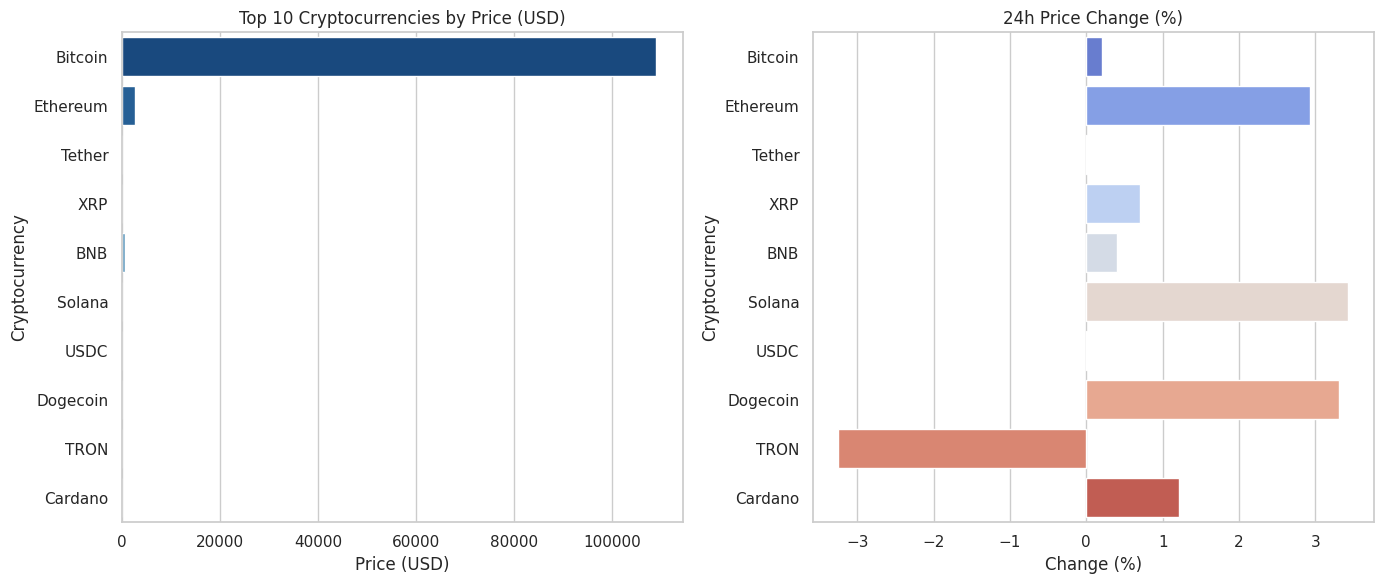

In [1]:
"""
Internship Project: Cryptocurrency Price Dashboard
Author: Prathiksha Jayachandran
Date: 11-06-2025
Description: This script fetches real-time cryptocurrency data from the CoinGecko API
             and visualizes the top 10 cryptocurrencies by current price and 24-hour price change.
"""

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
API_URL = 'https://api.coingecko.com/api/v3/coins/markets'
PARAMS = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 10,
    'page': 1,
    'sparkline': False
}
try:
    response = requests.get(API_URL, params=PARAMS)
    response.raise_for_status()
    crypto_data = response.json()
except requests.RequestException as e:
    print("Error fetching data from CoinGecko API:", e)
    crypto_data = []
if crypto_data:

    df = pd.DataFrame(crypto_data)
    df = df[['name', 'current_price', 'price_change_percentage_24h']]
    plt.figure(figsize=(14, 6))

    # --- Plot 1: Current Prices ---
    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x='current_price', y='name', palette='Blues_r')
    plt.title('Top 10 Cryptocurrencies by Price (USD)')
    plt.xlabel('Price (USD)')
    plt.ylabel('Cryptocurrency')

    # --- Plot 2: 24-Hour Price Change ---
    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x='price_change_percentage_24h', y='name', palette='coolwarm')
    plt.title('24h Price Change (%)')
    plt.xlabel('Change (%)')
    plt.ylabel('Cryptocurrency')

    plt.tight_layout()
    plt.show()
else:
    print("No data available to visualize.")
